In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# Read excel file
df_dist = pd.read_excel("Poblaciones.xlsx")
print("df_dist.shape", df_dist.shape)
df_dist.head()

df_dist.shape (206, 35)


Unnamed: 0                     NOMBRE Unnamed: 2  Identificador SEXO  EDAD  \
0           1       Yagual Soriano Tito   052-02-02              1    M    62   
1           2  Figueroa Suarez Silveria   054-01-05              1    F    62   
2           3  Gonzalez Clemente Gaspar   077-16-01              1    M    62   
3           4   Malave Clemente Eduardo   016-01-01              1    M    63   
4           5   Figueroa Medina Marlene   052-01-02              1    F    63   

   TALLA  PESO        IMC  Diabetes   ...  F. Diastolica   E/Ea  area aortica  \
0  158.5  84.4  33.595717          0  ...              2  10.40          2.10   
1  145.0  71.0  33.769322          0  ...              1   4.21          1.90   
2  153.0  59.0  25.203981          1  ...              1   4.27          2.07   
3  159.0  50.7  20.054586          1  ...              1   4.35          1.95   
4  141.0  58.1  29.223882          0  ...              1   7.04          2.10   

   Area Mitral  Unnamed: 29  Frec Card   Unnamed: 31  Unnamed: 32  \
0         4.32          NaN          62          NaN          NaN   
1         4.33          NaN          52          NaN          NaN   
2         3.83          NaN          59          NaN          NaN   
3         3.53          NaN          67          NaN          NaN   
4         3.59          NaN          73          NaN          NaN   

   Unnamed: 33  Unnamed: 34  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN  

[5 rows x 35 columns]

In [24]:
# Drop duplicates if any
df_dist.drop_duplicates(subset=None, keep='first', inplace=True)
df_dist.shape

(206, 35)

In [15]:
# List column names
df_dist.columns

Index(['Unnamed: 0', 'NOMBRE', 'Unnamed: 2', 'Identificador', 'SEXO', 'EDAD',
       'TALLA', 'PESO', 'IMC', 'Diabetes ', 'Hipertension', 'Hiperlipidemia ',
       'Tabaquismo', 'Stroke', 'ddvi', 'dsvi', 'septum', 'pp', 'fevi', 'tapse',
       'vol.lat cc', 'Volumen AI', 'PSAP', 'GC', 'Masa gr/m2', 'F. Diastolica',
       'E/Ea', 'area aortica', 'Area Mitral', 'Unnamed: 29', 'Frec Card ',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34'],
      dtype='object')

In [16]:
# Will drop unnecessary columns, including Unnamed: 2 which is not complete
df_dist.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 29', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34'], 
             inplace=True, axis=1)
df_dist.rename(columns={'Unnamed: 2': 'Registro'}, inplace=True)
df_dist.head()

NOMBRE  Identificador SEXO  EDAD  TALLA  PESO  \
0       Yagual Soriano Tito               1    M    62  158.5  84.4   
1  Figueroa Suarez Silveria               1    F    62  145.0  71.0   
2  Gonzalez Clemente Gaspar               1    M    62  153.0  59.0   
3   Malave Clemente Eduardo               1    M    63  159.0  50.7   
4   Figueroa Medina Marlene               1    F    63  141.0  58.1   

         IMC  Diabetes   Hipertension  Hiperlipidemia   ...  vol.lat cc  \
0  33.595717          0             0                0  ...       54.60   
1  33.769322          0             1                0  ...       58.24   
2  25.203981          1             0                0  ...       65.61   
3  20.054586          1             0                0  ...       38.49   
4  29.223882          0             1                0  ...       62.75   

   Volumen AI  PSAP    GC  Masa gr/m2  F. Diastolica   E/Ea  area aortica  \
0       32.26    31  4.02      149.45              2  10.40          2.10   
1       23.10    22  2.40       63.92              1   4.21          1.90   
2       23.31    24  2.74      128.64              1   4.27          2.07   
3       23.80    25  3.17      108.90              1   4.35          1.95   
4       28.08    21  4.10      115.39              1   7.04          2.10   

   Area Mitral  Frec Card   
0         4.32          62  
1         4.33          52  
2         3.83          59  
3         3.53          67  
4         3.59          73  

[5 rows x 28 columns]

In [17]:
df = df_dist.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 28 columns):
NOMBRE             206 non-null object
Identificador      206 non-null int64
SEXO               206 non-null object
EDAD               206 non-null int64
TALLA              206 non-null float64
PESO               206 non-null float64
IMC                206 non-null float64
Diabetes           206 non-null int64
Hipertension       206 non-null int64
Hiperlipidemia     206 non-null int64
Tabaquismo         206 non-null int64
Stroke             206 non-null int64
ddvi               206 non-null int64
dsvi               206 non-null int64
septum             206 non-null int64
pp                 206 non-null int64
fevi               206 non-null float64
tapse              206 non-null int64
vol.lat cc         206 non-null float64
Volumen AI         206 non-null float64
PSAP               206 non-null int64
GC                 206 non-null float64
Masa gr/m2         206 non-null float64
F. 

In [25]:
# See if any null values
df.isna().sum()

NOMBRE             0
Identificador      0
SEXO               0
EDAD               0
TALLA              0
PESO               0
IMC                0
Diabetes_          0
Hipertension       0
Hiperlipidemia_    0
Tabaquismo         0
Stroke             0
ddvi               0
dsvi               0
septum             0
pp                 0
fevi               0
tapse              0
vol.lat_cc         0
Volumen_AI         0
PSAP               0
GC                 0
Masa_gr/m2         0
F._Diastolica      0
E/Ea               1
area_aortica       0
Area_Mitral        0
Frec_Card_         0
dtype: int64

In [18]:
profile = df.profile_report(title="Información Clínica")
profile

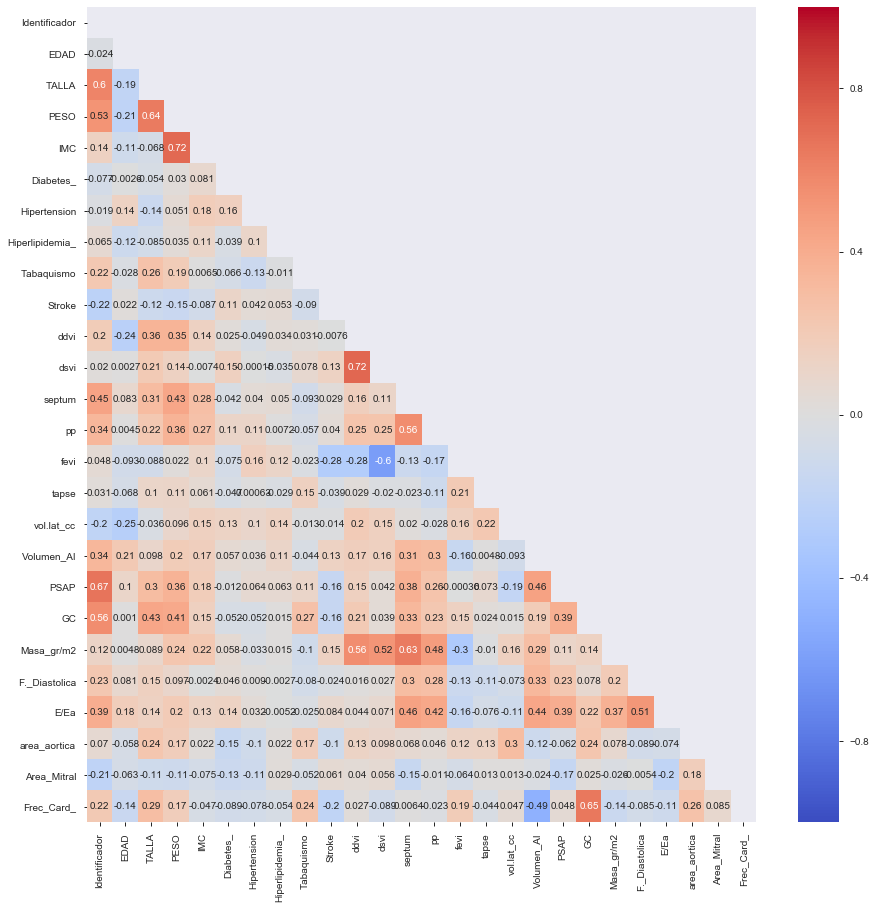

In [29]:
df_corr = df.corr()
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

In [33]:
# df is the pandas dataframe
# Explicit correlations
df_corr = df.corr()
c1 = df_corr.unstack().drop_duplicates()
c1.sort_values(ascending = False)

Identificador  Identificador    1.000000
ddvi           dsvi             0.724030
PESO           IMC              0.716838
Identificador  PSAP             0.670973
GC             Frec_Card_       0.654002
TALLA          PESO             0.638109
septum         Masa_gr/m2       0.632897
Identificador  TALLA            0.598487
ddvi           Masa_gr/m2       0.561019
septum         pp               0.558756
Identificador  GC               0.555370
               PESO             0.527796
dsvi           Masa_gr/m2       0.518798
F._Diastolica  E/Ea             0.512324
pp             Masa_gr/m2       0.478700
Volumen_AI     PSAP             0.458680
septum         E/Ea             0.455067
Identificador  septum           0.445818
Volumen_AI     E/Ea             0.435522
PESO           septum           0.432863
TALLA          GC               0.429975
pp             E/Ea             0.422394
PESO           GC               0.414449
Identificador  E/Ea             0.393183
PSAP           E